Upload your .traineddata first

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python-headless
!git clone --branch 5.0.0-alpha https://github.com/tesseract-ocr/tesseract.git
!cd tesseract && ./autogen.sh
!cd tesseract && ./configure
!cd tesseract && make
!cd tesseract && make install
import pytesseract
import cv2
import re
import numpy as np
from google.colab.patches import cv2_imshow
! sudo mv "/content/lets.traineddata" "/usr/share/tesseract-ocr/4.00/tessdata"

In [ ]:
import os

# Set the TESSDATA_PREFIX environment variable
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata/'

# Now, you can run your Tesseract command


Saving TESTOPM.jpg to TESTOPM.jpg
gray


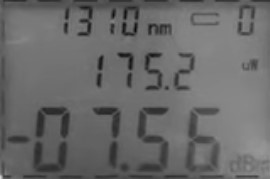

blur1


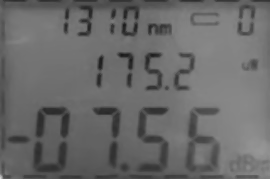

blur2


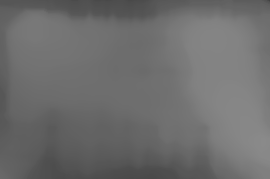

divided


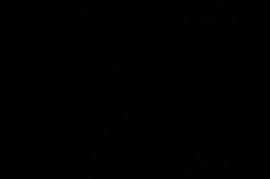

normalized


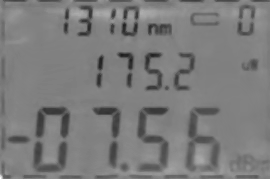

threshed


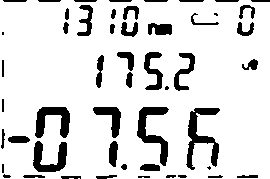

eroded


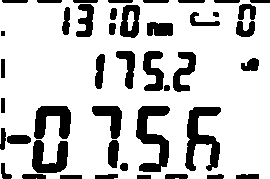

Recognized value: .--8 06-0-0-
1 05.2 -
..-.0..1.5.6-



In [ ]:
from google.colab import files

uploaded = files.upload()
for image_path in uploaded.keys():
  fname = image_path

  # grayscale
  bgray = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
  print("gray")
  cv2_imshow(bgray)

  # median blur
  blurred1 = cv2.medianBlur(bgray,3)
  print("blur1")
  cv2_imshow(blurred1)
  blurred2 = cv2.medianBlur(bgray,41)
  print("blur2")
  cv2_imshow(blurred2)

  # division
  divided = np.ma.divide(blurred1, blurred2).data
  print("divided")
  cv2_imshow(divided)

  # normalize
  normed = np.uint8(255*divided/divided.max())
  print("normalized")
  cv2_imshow(normed)

  # thresholding,
  # Otsu's method automatically determines the threshold value based on the image's histogram
  _, threshed = cv2.threshold(normed, 100, 255, cv2.THRESH_OTSU)
  print("threshed")
  cv2_imshow(threshed)

  # erosion
  kernel = np.ones((3, 3), np.uint8)
  eroded_img = cv2.erode(threshed, kernel, iterations=1)
  print("eroded")
  cv2_imshow(eroded_img)


  # text recognition
  digits = pytesseract.image_to_string(eroded_img, lang='lets', config='--psm 6')
  match = re.search(r'(-\d{2})[-.]?(\d{2})', digits)
  if match:
    result = match.group(1) + '.' + match.group(2)
    print(f"Recognized value: {result}")
  else: print(f"Recognized value: {digits}")

